# Kaggle Survey - Data Analysis Report
https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science

## About the Survey
이 설문조사에 16716명의 Kaggle 응답자가 있었습니다. 이 질문에는 작업 커뮤니티와 학습 커뮤니티 모두에 대한 특정 DS/ML 질문으로 넘어가기 전에 일반적인 인구 통계 질문부터 시작하여 광범위한 스펙트럼이 다루어졌습니다.

이 설문조사와 함께 제공되는 파일은 5개입니다.

- multipleChoiceResponses.csv : 객관식 질문에 대한 참가자의 답변입니다. 각 열에는 특정 질문에 대한 응답자 한 명의 답변이 들어 있습니다.
- freeform Responses.csv : 응답자가 'Other'를 선택하고 'Please specify' 부분을 채울 때마다, 이 csv파일에 응답이 추가됩니다.
- schema.csv : 이 파일은 질문받은 모든 질문을 포함하고, 각각의 질문에 대해 설명하고, 질문받은 사람(학습자, 코더 등)을 정확하게 설명합니다.
- RespendTypeREADME.txt : Kaggle에 의해 인스턴스가 정의되는 방법, 즉 학습자, 작업자, 코딩 작업자 등을 이해하기 위한 것입니다.
- conversionRates.csv : USD에 대한 환율입니다.

가장 중요한 파일은 필요한 대부분의 정보를 포함하는 multipleChoiceRespones.csv입니다. ResponentTypeREADME.txt는 kagglers 및 schema.csv의 특정 커뮤니티의 동작을 이해하려는 경우에 필요합니다.

파일을 로드해보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import operator

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
cvRates = pd.read_csv('./input/conversionRates.csv', encoding='ISO-8859-1')
freeForm = pd.read_csv('./input/freeformResponses.csv', encoding='ISO-8859-1')
data = pd.read_csv('./input/multipleChoiceResponses.csv', encoding='ISO-8859-1')
schema = pd.read_csv('./input/schema.csv', encoding='ISO-8859-1')

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning:

Columns (5,17,21,38,50) have mixed types.Specify dtype option on import or set low_memory=False.

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.



## 1. Tell me about yourself

### Gender, age and country

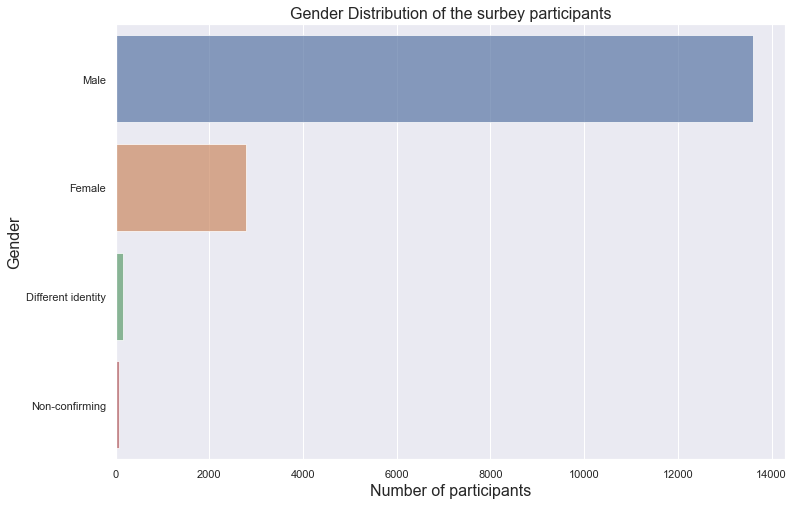

Proportion of women in this survey: 16.71%
Proportion of men in this survey: 81.88%


In [4]:
plt.figure(figsize=(12,8))
genders = data['GenderSelect'].value_counts()
sns.barplot(y=genders.index, x=genders.values, alpha=0.7)
plt.yticks(range(len(data['GenderSelect'].value_counts().index)), ['Male', 'Female', 'Different identity', 'Non-confirming'])
plt.title('Gender Distribution of the surbey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()
print('Proportion of women in this survey: {:0.2f}%'.format(100*len(data[data['GenderSelect']=='Female'])/len(data['GenderSelect'].dropna())))
print('Proportion of men in this survey: {:0.2f}%'.format(100*len(data[data['GenderSelect']=='Male'])/len(data['GenderSelect'].dropna())))

성별 격차가 매우 큽니다. 남성의 여성이 약 5배 정도 되네요.

In [5]:
print('{} instances seem to be too old (>65 years old)'.format(len(data[data['Age']>65])))
print('{} instances seem to be too young (<15 years old)'.format(len(data[data['Age']<15])))

154 instances seem to be too old (>65 years old)
35 instances seem to be too young (<15 years old)


이러한 맞지 않는 예를 제거하면(나이가 다른 속성에 영향을 미치지 않는다는 것을 나중에 알게되므로 유지합니다) 보다 좋은 결과를 얻을 수 있습니다.

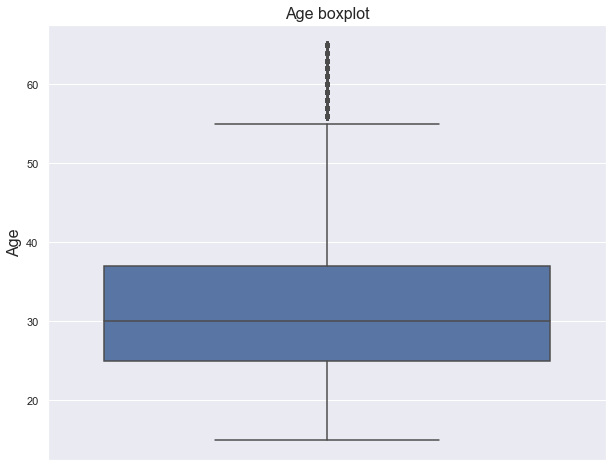

In [6]:
age=data[(data['Age']>=15) & (data['Age']<=65)]
plt.figure(figsize=(10,8))
sns.boxplot(y=age['Age'], data=age)
plt.title('Age boxplot', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

중위값은 30세이고 대다수의 참여자는 25세에서 37세 사이입니다.

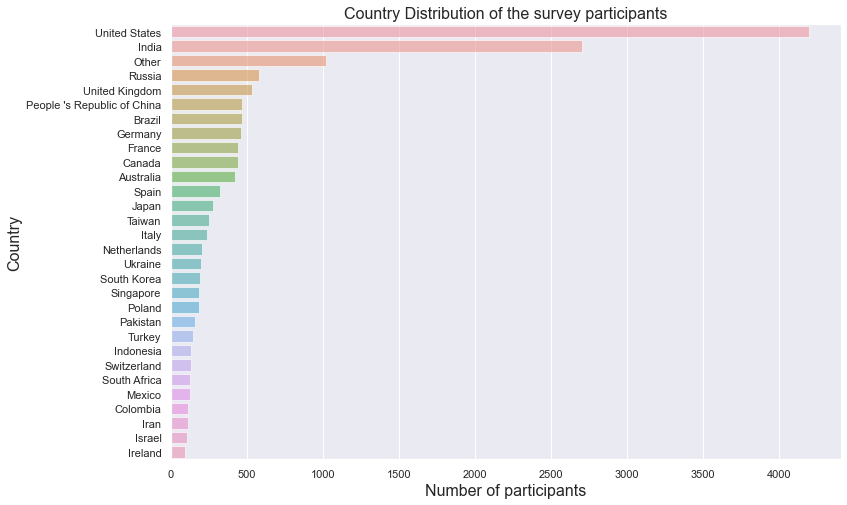

In [7]:
plt.figure(figsize=(12,8))
countries = data['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title('Country Distribution of the survey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.show()

대부분의 캐글러들은 미국인과 인도인입니다. 

In [8]:
print('{:0.2f}% of the instances are Americans'.format(100*len(data[data['Country']=='United States'])/len(data)))
print('{:0.2f}% of the instances are Indians'.format(100*len(data[data['Country']=='India'])/len(data)))

25.11% of the instances are Americans
16.18% of the instances are Indians


모든 참가자중 41.29%가 미국인 또는 인도인입니다. 

### Formal education and Major

In [9]:
edu = data['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum())*100))
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textfont=dict(size=20),
               showlegend=False)
layout = go.Layout(
    title='Formal Education of the survey participants'
)
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Formal_Education')

절반에 살짝 못미치는 캐글러들이 석사학위를 가지고 있습니다. 약 80%가 학사학위를 가지고 있습니다.

In [11]:
data['MajorSelect'] = data['MajorSelect'].replace('Information technology, networking, or system administration', 'Information tech / System admin')

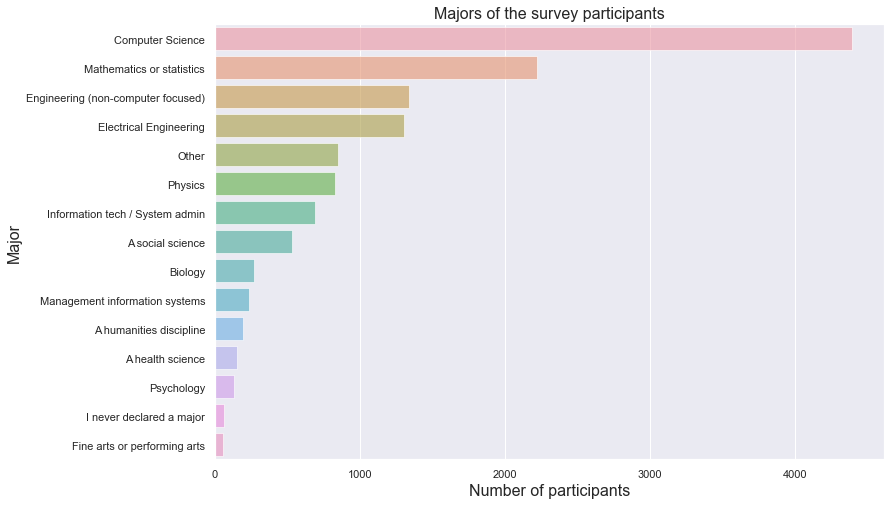

In [17]:
plt.figure(figsize=(12,8))
majors = data['MajorSelect'].value_counts()
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title('Majors of the survey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Major', fontsize=16)
plt.show()

컴퓨터 과학이 주류를 이루고 있습니다. 수학 또는 통계학의 약 두배정도입니다. 그다음으로는 공학, 전기전자공학이 뒤를 잇습니다.

### How did you start learning Data Science

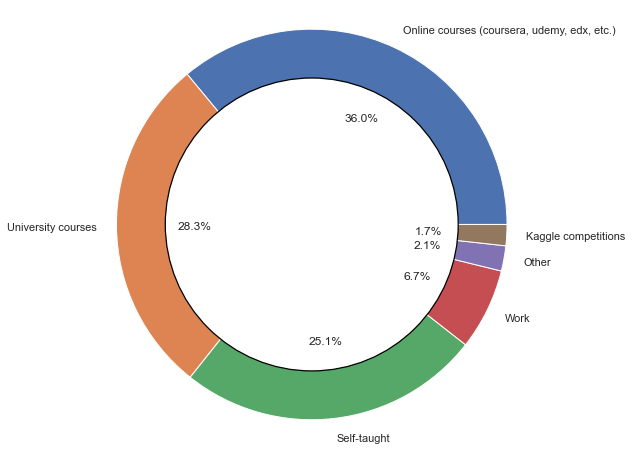

In [18]:
plt.figure(figsize=(10,8))
temp = data['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# draw a circle at the center of pie make it look like a donut
center_circle = plt.Circle((0,0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# set aspect ratio to be equal so that pie is drawn as as circle
plt.axis('equal')
plt.show()

처음 배울 때 온라인교육과정으로 배운 것이 가장 많은 선택을 받았습니다. 

캐글로 시작한 사람은 매우 작습니다. 이는 어찌보면 캐글을 경연하기 위해 참가하지 처음부터 배우기위해 오진 않기 때문에 당연한 결과이기도 합니다.

### Employment status

In [20]:
data['EmploymentStatus'] = data['EmploymentStatus'].replace('Independent contractor, freelancer, or self-employed', 'Independent')

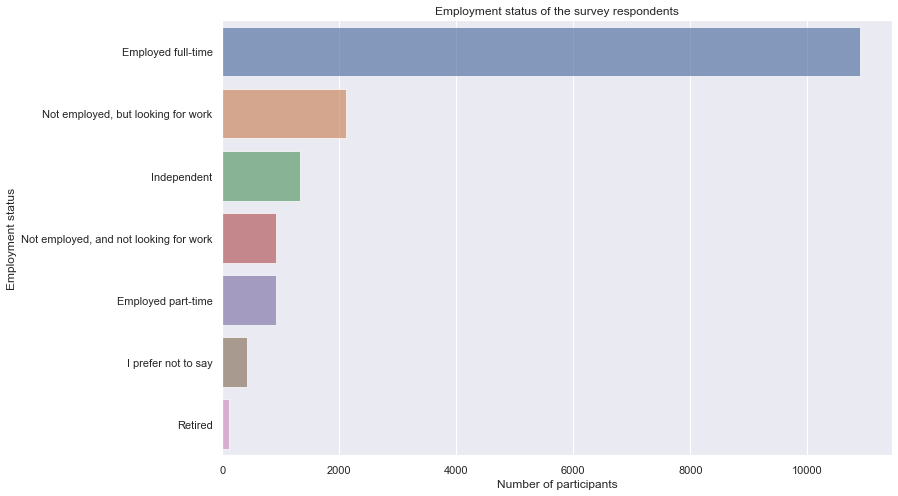

In [23]:
plt.figure(figsize=(12, 8))
status = data['EmploymentStatus'].value_counts()
sns.barplot(y=status.index, x=status.values, alpha=0.7)
plt.title('Employment status of the survey respondents')
plt.xlabel('Number of participants')
plt.ylabel('Employment status')
plt.show()

In [33]:
print('{:0.2f}% of the instances are employed full-time'.format(100*len(data[data['EmploymentStatus']=='Employed full-time'])/len(data)))
print('{:0.2f}% of the instances are employed'\
      .format(100*(status.values[0] + status.values[4])/len(data)))

65.19% of the instances are employed full-time
70.67% of the instances are employed


대다수의 사람들이 고용된 상태입니다. 그러나 프리랜서처럼 고용되지 않은 사람들도 일정 부분 존재합니다. 

### Would you like to work in Data Science?
'데이터 사이언스로의 커리어 전환을 시도하고 있습니까?'라는 흥미로운 질문이 설문에 있습니다. 오직 3012명의 응답자가 이에 응답했습니다. 제 추측은 다른 응답자들은 이미 데이터 사이언티스트로 근무하고 있어 응답할 필요가 없었거나, 아직 학생일수도 있습니다.

In [36]:
car = data['CareerSwitcher'].value_counts()
labels = (np.array(car.index))
proportions = (np.array((car/car.sum())*100))
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=labels, values=proportions,
               hoverinfo='label+percent',
               marker = dict(colors=colors,
                             line=dict(color='#000000', width=2)))

layout = go.Layout(
    title = 'Working people looking up switch careers to data science'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Career_Switcher')

아직 데이터사이언티스트가 아닌 캐글러중 70%가 데이터사이언티스트로 전환을 꿈꾸고 있습니다. 이 질문은 자유 형식 질문으로 나온 몇 안되는 질문 중 하나입니다. 즉 질문에 선택지가 없습니다. 

다음은 위 질문에 '아니오'라고 대답한 사람들이 가장 많이 상요한 단어가 무엇인지 살펴보겠습니다. ['data', 'science', 'mining', 'big', 'bigdata', 'machine', 'learning']등이 많이 나왔습니다.

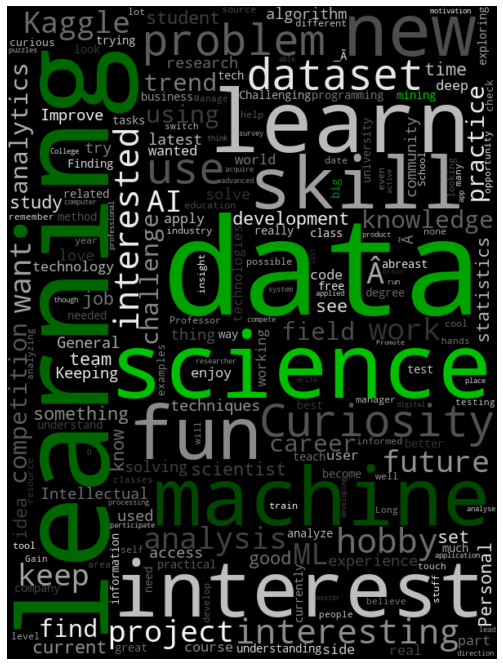

In [39]:
from wordcloud import (WordCloud, get_single_color_func)

class GroupedColorFunc(object):
    
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]
        
        self.default_color_func = get_single_color_func(default_color)
        
    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words
            )
        except StopIteration:
            color_func = self.default_color_func
            
        return color_func
    
    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)
    
# get text data from the freeform
text = freeForm[pd.notnull(freeForm['KaggleMotivationFreeForm'])]['KaggleMotivationFreeForm']

wc = WordCloud(collocations=False, height=800, width=600, relative_scaling=0.2,
               random_state=74364).generate(" ".join(text))

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['data', 'science', 'mining', 'big', 'bigdata', 'machine', 'learning']
}

# Words that are not in any of the color_to_words values will be colored with grey
default_color = 'grey'

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply out color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

녹색으로 선택된 키워드는 주어진 답변에서 가장 많이 사용되는 단어입니다. 모든 단어가 어떻게 연결되어 있는지 알아보겠습니다.

- Curiosity, interest(intersting)이 자주 사용되었는데, 예를 들어 '기계 학습에 대한 관심'이라는 답이 몇 개 있었음을 암시합니다.
- hobby, fun도 빈번하게 사용되었고, 그것은 몇몇 사람들이 재미로 데이터 과학을 연습하고 대회에 참가하는 것을 암시합니다, 그들이 그 분야에서 일하고 싶어서가 아니라, 재미를 위해서라는 것이죠.
- challenge, project, competition도 인기가 많았습니다.

## 2. Python vs R: Let the battle begin!
'데이터 과학 분야에 R 또는 Python 중 무엇을 사용하십니까?'라는 질문은 데이터 과학에 대한 지망생이라면 한 번쯤은 하는 질문입니다. 몇 달 전, 여론 조사에 따르면 파이썬이 확실히 R을 앞질렀고 데이터 사이언스의 선두 언어가 되었다고 합니다. 이 설문조사는 우리가 더 깊이 파고들 수 있도록 할 것입니다.

먼저, 우리는 인스턴스 중에서 R과 Python 사용자를 식별해야 합니다. 현재 직장에서 데이터를 분석하기 위해 코드를 작성한다는 응답자(코드 작업자):
"Employed full-time" 또는 "Employed part-time"이라고 응답한 응답자만 살펴봅니다.

Python과 R의 사용빈도에 관한 질문이 있었는데, 'Rare'에서 'Most of the time'까지의 빈도로 이루어져있습니다.

대부분 Python을 사용하지만 R을 많이 사용하지 않는 사용자는 Python 사용자로 간주됩니다.
대부분 R을 사용하고 Python을 많이 사용하지 않는 사용자는 R 사용자로 간주됩니다.
R과 Python을 동일하게, 적어도 자주 사용하는 사용자는 'Both'로 분류됩니다.

In [44]:
t2 = data[['WorkToolsFrequencyR', 'WorkToolsFrequencyPython']].fillna(0)
t2.replace(to_replace=['Rarely', 'Sometimes', 'Often', 'Most of the time'], value=[1, 2, 3, 4], inplace=True)
t2['PythonVsR'] = ['R' if (freq1>2 and freq1>freq2) else
                   'Python' if (freq1<freq2 and freq2>2) else
                   'Both' if (freq1==freq2 and freq1>2) else
                   'None' for (freq1, freq2) in zip(t2['WorkToolsFrequencyR'], t2['WorkToolsFrequencyPython'])]
data['PythonVsR'] = t2['PythonVsR']

df = data[data['PythonVsR'] != 'None']
print('Python users:', len(df[df['PythonVsR'] == 'Python']))
print('R users:', len(df[df['PythonVsR'] == 'R']))
print('Python+R users:', len(df[df['PythonVsR'] == 'Both']))

Python users: 3438
R users: 1851
Python+R users: 878


파이썬만 사용하는 유저가 R만 사용하는 유저의 두배임을 알 수 있습니다.